Flores Lara Alberto 6BV1

Clasificación para CIFAR usando CNN con regularizacion

Librerias necesarias:

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.metrics import classification_report
import time

Definir las funciones para crear la CNN regularizada y para el entrenamiento y validación del modelo

In [10]:
def build_cnn_regularized(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=30, batch_size=64):
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    end_time = time.time()

    # Evaluación
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    report = classification_report(y_true, y_pred, target_names=[f'Clase {i}' for i in range(10)])
    print(report)
    print(f"Tiempo de entrenamiento: {end_time - start_time:.2f} segundos")

    return history, end_time - start_time

Cargar los datos de entrada

In [11]:
# Cargar CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [12]:
model_cnn_reg = build_cnn_regularized((32, 32, 3))
history_cnn_reg, time_cnn_reg = train_and_evaluate(model_cnn_reg, x_train, y_train_cat, x_test, y_test_cat)

c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.2777 - loss: 2.0831 - val_accuracy: 0.4946 - val_loss: 1.5554
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4570 - loss: 1.6320 - val_accuracy: 0.5442 - val_loss: 1.4356
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5036 - loss: 1.5366 - val_accuracy: 0.5889 - val_loss: 1.3652
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.5252 - loss: 1.4850 - val_accuracy: 0.6046 - val_loss: 1.3153
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.5417 - loss: 1.4567 - val_accuracy: 0.6217 - val_loss: 1.2955
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5584 - loss: 1.4214 - val_accuracy: 0.6341 - val_loss: 1.2620
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.5679 - loss: 1.4074 - val_accuracy: 0.6348 - val_loss: 1.2553
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5798 - loss: 1.3830 - 

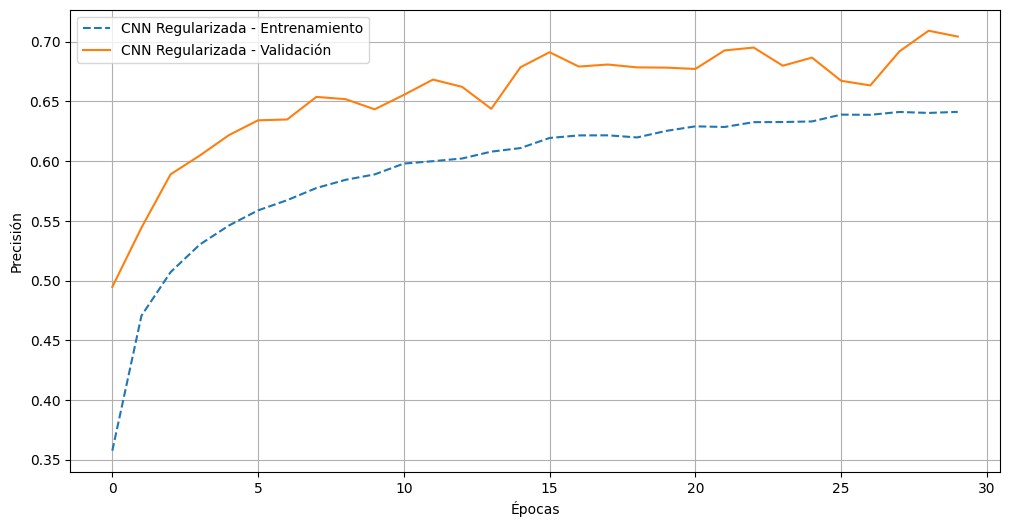

In [13]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_reg], ['CNN Regularizada'])


Clasificación para Mnist usando CNN regularizada

Cargar los datos de entrada

In [14]:
# Cargar Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos los valores de los píxeles en el rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape para agregar el canal de color (1 para MNIST)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convertimos las etiquetas a one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Inicializar el modelo con el tamaño de nuestras imagenes y realizar el entrenamiento con la validacion

In [15]:
model_cnn_reg = build_cnn_regularized((28, 28, 1))
history_cnn_reg, time_cnn_reg = train_and_evaluate(model_cnn_reg, x_train, y_train_cat, x_test, y_test_cat, 10)

Epoch 1/10


c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.7932 - loss: 0.8447 - val_accuracy: 0.9790 - val_loss: 0.2212
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9563 - loss: 0.2885 - val_accuracy: 0.9825 - val_loss: 0.1810
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 0.9634 - loss: 0.2439 - val_accuracy: 0.9811 - val_loss: 0.1778
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9666 - loss: 0.2310 - val_accuracy: 0.9842 - val_loss: 0.1637
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9672 - loss: 0.2231 - val_accuracy: 0.9856 - val_loss: 0.1595
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9701 - loss: 0.2191 - val_accuracy: 0.9877 - val_loss: 0.1504
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9716 - loss: 0.2107 - val_accuracy: 0.9873 - val_loss: 0.1546
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9719 - loss: 0.2067 - val_accurac

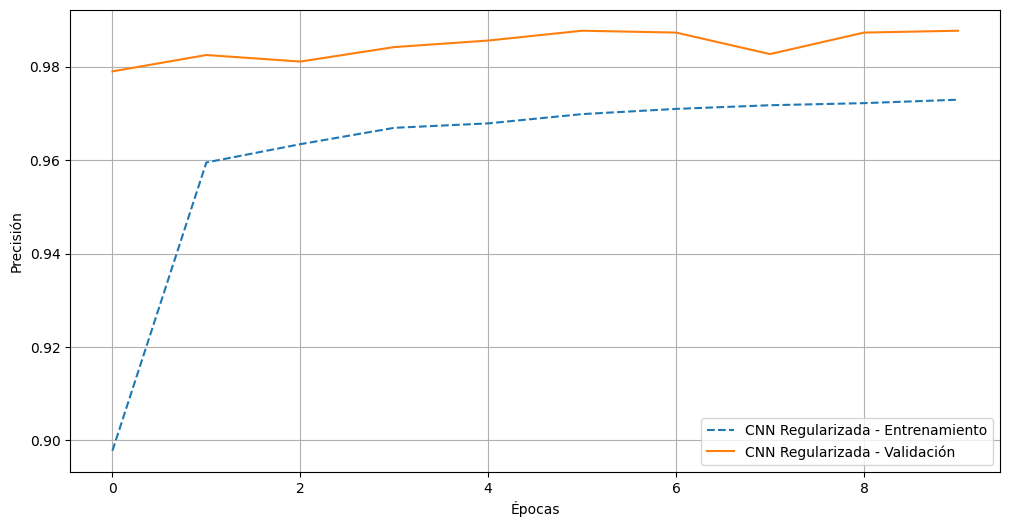

In [16]:
# Graficar precisión de entrenamiento y validación
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} - Entrenamiento', linestyle='--')
        plt.plot(history.history['val_accuracy'], label=f'{label} - Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history([history_cnn_reg], ['CNN Regularizada'])
